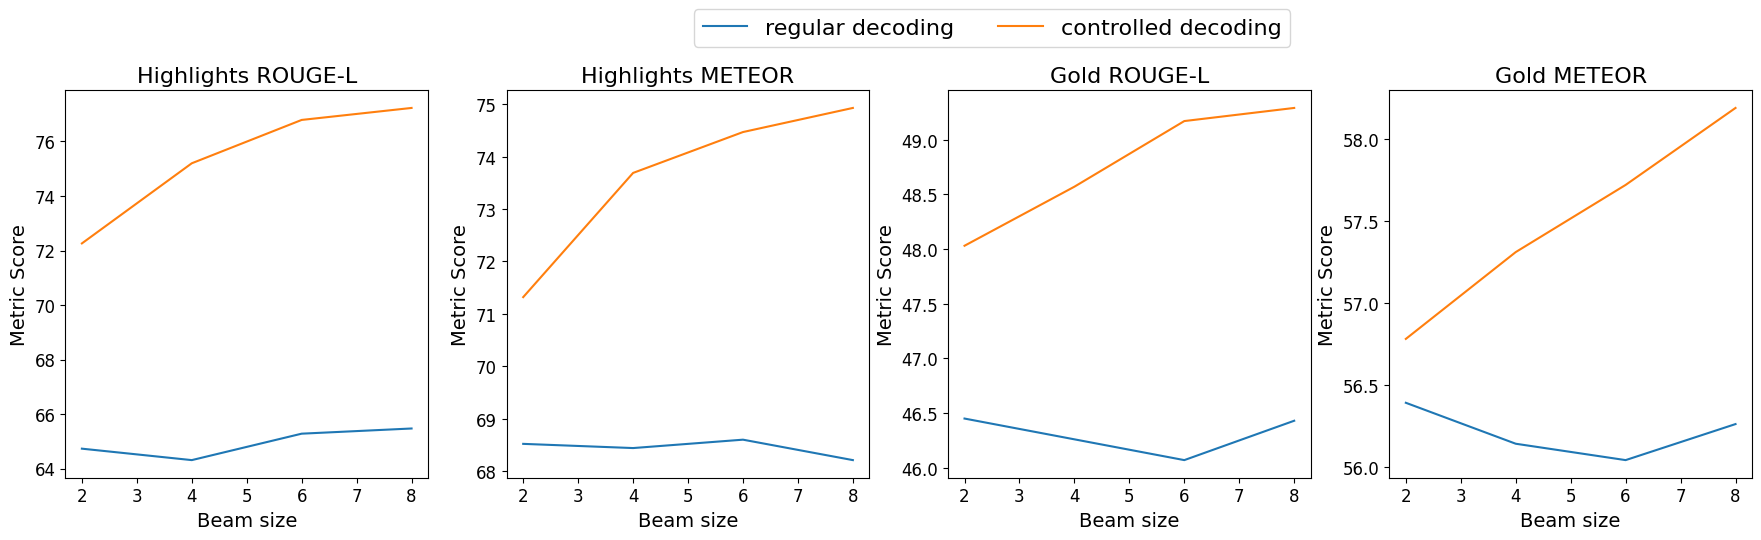

In [25]:
# Data copied from: https://docs.google.com/spreadsheets/d/1_IcN2ne9UfRPspPQlurn0-pbAmjZtQ3vlN53daZo500/edit#gid=0

results = {
    "Highlights ROUGE-L": {
        "no_lookahead": {
            "2": 64.73,
            "4": 64.31,
            "6": 65.28,
            "8": 65.47
        },
        "lookahead_flan": {
            "2": 72.26,
            "4": 75.2,
            "6": 76.79,
            "8": 77.23
        }
    },
    "Highlights METEOR": {
        "no_lookahead": {
            "2": 68.52,
            "4": 68.44,
            "6": 68.6,
            "8": 68.21
        },
        "lookahead_flan": {
            "2": 71.32,
            "4": 73.69,
            "6": 74.47,
            "8": 74.93,
        }
    },
    "Gold ROUGE-L": {
        "no_lookahead": {
            "2": 46.45,
            "4": 46.26,
            "6": 46.07,
            "8": 46.43
        },
        "lookahead_flan": {
            "2": 48.03,
            "4": 48.57,
            "6": 49.17,
            "8": 49.29
        }
    },
    "Gold METEOR": {
        "no_lookahead": {
            "2": 56.39,
            "4": 56.14,
            "6": 56.04,
            "8": 56.26
        },
        "lookahead_flan": {
            "2": 56.78,
            "4": 57.31,
            "6": 57.72,
            "8": 58.19
        }
    }
}

import matplotlib.pyplot as plt


x = [2, 4, 6, 8]  # x-axis values

rename_map = {
    "no_lookahead": "regular decoding",
    "lookahead_flan": "controlled decoding"
}

# # For each metric, plot a figure
# for metric, data in results.items():
#     for rename_from, rename_to in rename_map.items():
#         data[rename_to] = data.pop(rename_from)
#
#     plt.figure()  # Create a new figure
#     plt.title(metric, fontsize=16)  # Set the figure title
#
#     # For each algorithm, plot a line
#     for algorithm, y_values in data.items():
#         y = list(y_values.values())  # y-axis values
#         plt.plot(x, y, label=algorithm)
#
#
#     plt.xlabel('Beam size', fontsize=14)
#     plt.ylabel('Metric Score', fontsize=14)
#     plt.legend(fontsize=12)  # Show legend
#     # plt.show()  # Show the plot
#     plt.tight_layout()
#     plt.subplots_adjust(right=0.88)  # Adjust right padding
#     plt.savefig(metric.replace("-","_"))


# Create a figure and axes
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Increase the global font size
plt.rcParams.update({'font.size': 12})

# For each metric, plot a subfigure
for ax, (metric, data) in zip(axs, results.items()):
    for rename_from, rename_to in rename_map.items():
        data[rename_to] = data.pop(rename_from)
#
    ax.set_title(metric, fontsize=16)  # Set the subfigure title

    # For each algorithm, plot a line
    for algorithm, y_values in data.items():
        y = list(y_values.values())  # y-axis values
        ax.plot(x, y, label=algorithm)

    ax.set_xlabel('Beam size', fontsize=14)
    ax.set_ylabel('Metric Score', fontsize=14)

# Adjust padding
fig.tight_layout()
fig.subplots_adjust(right=0.88)

# Create legend
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=16, bbox_to_anchor=(0.5, 1.1))

# Save the figure
plt.savefig("controlled_decoding_beam_tuning.png", bbox_inches='tight')